<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#badanie-r^2" data-toc-modified-id="badanie-r^2-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>badanie r^2</a></span></li></ul></div>

# Zadanie
- Wyznacz model regresji liniowej dla zestawienia "Y house price of unit area" od "X2 house age" w datasecie "estate.csv"
- zbadaj poziom korelacji za pomocą metryki r2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [33]:
# jeśli nie korzystasz z poniższej paczki, to wykomentuj te dwie linie poniżej
# from jupyterthemes import jtplot
# jtplot.style(theme="monokai", context="notebook", ticks=True, grid=False)

In [3]:
df = pd.read_csv('data/estate.csv')

In [4]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [10]:
df.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [11]:
for k in df.keys():
    tmpNum = df.columns.get_loc(k)
    print(tmpNum,k)

0 No
1 X1 transaction date
2 X2 house age
3 X3 distance to the nearest MRT station
4 X4 number of convenience stores
5 X5 latitude
6 X6 longitude
7 Y house price of unit area


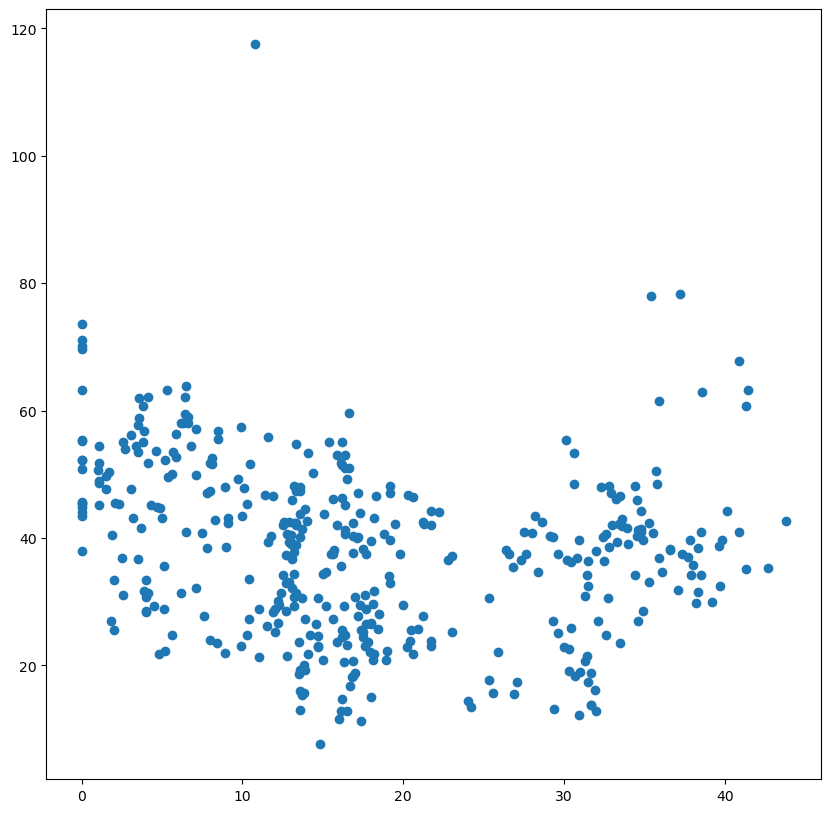

In [15]:
tmpDF = df.sort_values(by=['X2 house age'])

x = np.array(tmpDF.iloc[:,2]) # wszystkie wiersze, druga kolumna 'age'
y = np.array(tmpDF.iloc[:,7]) # wszystkie wiersze, 7 kolumna 'price'
fig = plt.figure(figsize=(10,10))
plt.plot(x, y, linestyle='none', marker='o')
plt.show()

In [16]:
# Przygotowanie danych
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)
# Model
model = LinearRegression()
# Uczenie
model.fit(x,y)

LinearRegression()

In [17]:
model.score(x, y)

0.04433848097791171

In [23]:
a = model.coef_[0][0]
b = model.intercept_[0]

In [24]:
def linearFunction(a,b,x):
    return a*x+b

In [25]:
x_reg = x
y_reg = linearFunction(a,b,x_reg)

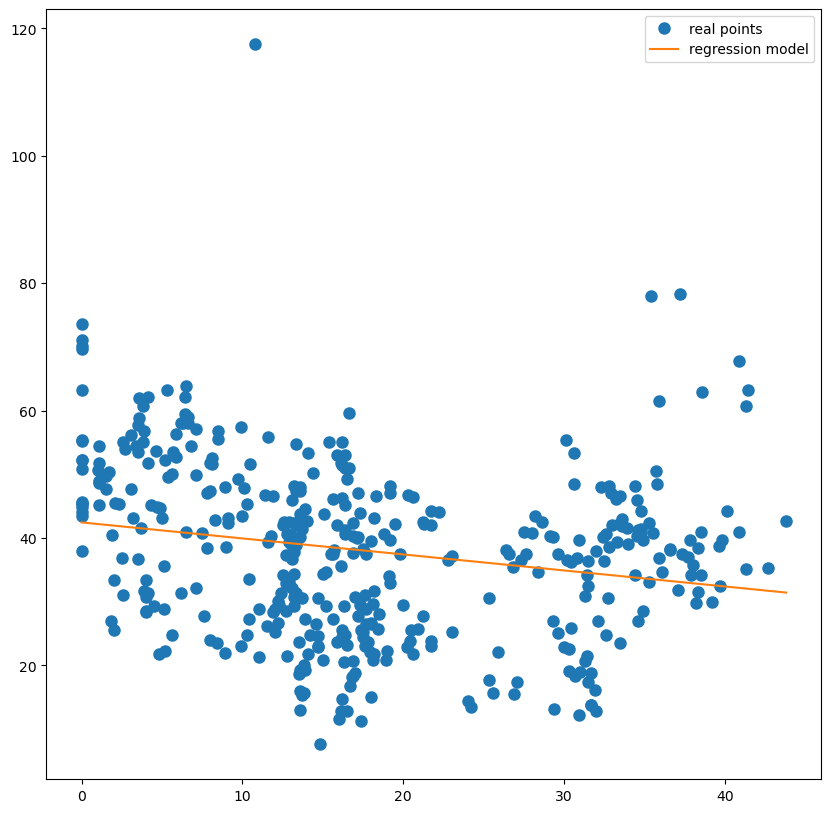

In [26]:
fig = plt.figure(figsize=(10,10))
plt.plot(x,y,linestyle="none", marker='o', markersize=8, label="real points")
plt.plot(x_reg, y_reg, label="regression model")
plt.legend()
plt.show()

In [22]:
from sklearn.metrics import r2_score
print("R kwadrat: ", r2_score(y, y_reg))

R kwadrat:  0.04433848097791171
